In [3]:
import numpy as np
import networkx as nx
from edge_fetch import edge_terrier
from sklearn.cluster import AffinityPropagation
from sklearn.preprocessing import normalize
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

### Load the edgelists
edge_fetch.py is used to gather all of the edgelists in the JHU directory. 

In [4]:
# Initialize edgelist collector object
graph_collector = edge_terrier('/Users/paigefrank/Library/Python/3.6/bin/aws',filepath='hbn/derivatives/graphs/JHU/')
# Make a generator that yields all edgelists in filepath
filelist = graph_collector.convert_edgelist_all()
# Get a list of just the network x objects
graphList = graph_collector.getGraphs(filelist)

sub-NDARDX770PJK_acq-64dir_dwi_JHU.edgelist is empty.


### Cluster
The preference value is varied and 

26 0.25



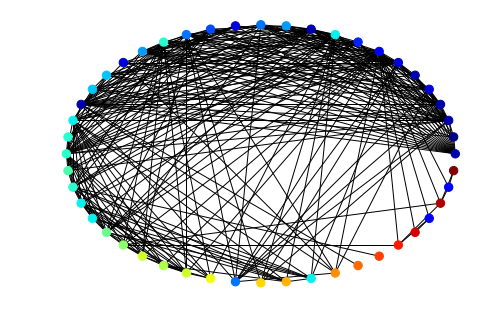

In [5]:
graphsLabels = []
# run affinity propogation on all edgelists in JHU #
# i is used to vary the preference #
for i in range(1, 10):
    labels_tot = []
    preproc = .01 * i 
    for graph in graphList:
        inputGraph = normalize(nx.to_numpy_matrix(graph))
        af = AffinityPropagation(damping = .9, preference = preproc,affinity="precomputed").fit(inputGraph)
        cluster_centers_indices = af.cluster_centers_indices_
        labels = af.labels_
        n_clusters = len(cluster_centers_indices)
        labels_tot.append(labels)
    graphsLabels.append(labels_tot)
    # plot the graphs with the nodes colored according to their cluster assignment #
    plt.figure(i)
    print(n_clusters, preproc)
    print(graph)
    nx.draw_shell(graph, cmap=plt.get_cmap('jet'), node_color=labels, node_size = 70)
    plt.show()


## Create a similarity matrix based on how many times nodes are clustered together.

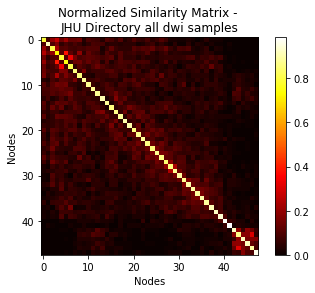

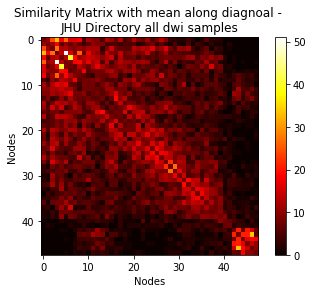

In [6]:
num = 0 # number of figures
for labels_t in graphsLabels:  
    #only plot lists that have 48 nodes
    labels_t = [x for x in labels_t if len(x) == 48]
    simMat = np.zeros((48, 48))
    # create a similarity matrix based on how many times nodes are clustered together #
    # loop through node 1 #
    for i in range(0, 48):
        # loop through node 2 #
        for j in range(0, 48):
            count = 0
            for sample in labels_t:
                if sample[i] == sample[j]:
                    #count how many times i and j have the same label in samples
                    count = count + 1
            simMat[i,j] = count

    # print a heatmap of the normalize simMat #
    normSimMat = normalize(simMat)
    plt.figure(num)
    im = plt.imshow(normSimMat, cmap='hot', interpolation='nearest')
    cbar = plt.colorbar(im)
    plt.xlabel('Nodes')
    plt.ylabel('Nodes')
    plt.title("Normalized Similarity Matrix - \nJHU Directory all dwi samples")
    plt.show()
    num = num + 1
    
    # print a heatmap of the simMat with the diagonal set to the avg value #
    simMean = np.mean(simMat)
    for k in range(0,48):
        simMat[k,k] = simMean
    plt.figure(num)
    im = plt.imshow(simMat, cmap='hot', interpolation='nearest')
    cbar = plt.colorbar(im)
    plt.draw()
    plt.xlabel('Nodes')
    plt.ylabel('Nodes')
    plt.title("Similarity Matrix with mean along diagnoal - \nJHU Directory all dwi samples")
    plt.show()
    num = num + 1
